# Clip Vector Data with GeoPandas


Learn how to clip geometries to the boundary of a polygon geometry
using GeoPandas.

The example below shows you how to clip a set of vector geometries
to the spatial extent / shape of another vector object. Both sets of geometries
must be opened with GeoPandas as GeoDataFrames and be in the same Coordinate
Reference System (CRS) for the `clip` function in GeoPandas to work.

This example uses GeoPandas example data ``'naturalearth_cities'`` and
``'naturalearth_lowres'``, alongside a custom rectangle geometry made with
shapely and then turned into a GeoDataFrame.

<div class="alert alert-info">
    
Note

The object to be clipped will be clipped to the full extent of the clip
object. If there are multiple polygons in clip object, the input data will
be clipped to the total boundary of all polygons in clip object.
</div>



Import Packages
---------------

To begin, import the needed packages.



In [2]:
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Polygon

Get or Create Example Data
--------------------------

Below, the example GeoPandas data is imported and opened as a GeoDataFrame.
Additionally, a polygon is created with shapely and then converted into a
GeoDataFrame with the same CRS as the GeoPandas world dataset.



In [3]:
capitals = geopandas.read_file(geopandas.datasets.get_path("naturalearth_cities"))
world = geopandas.read_file(geopandas.datasets.get_path("naturalearth_lowres"))

# Create a subset of the world data that is just the South American continent
south_america = world[world["continent"] == "South America"]

# Create a custom polygon
polygon = Polygon([(0, 0), (0, 90), (180, 90), (180, 0), (0, 0)])
poly_gdf = geopandas.GeoDataFrame([1], geometry=[polygon], crs=world.crs)

Plot the Unclipped Data
-----------------------



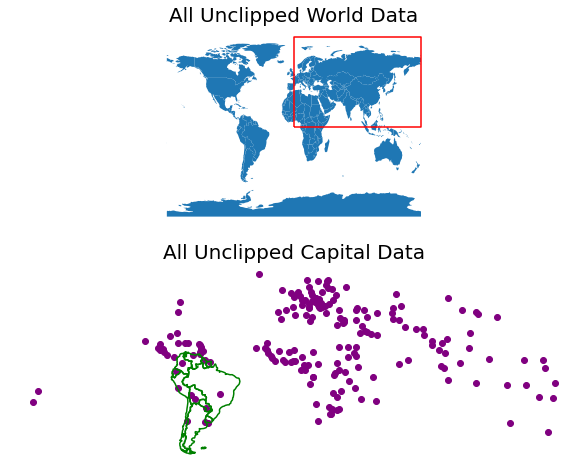

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
world.plot(ax=ax1)
poly_gdf.boundary.plot(ax=ax1, color="red")
south_america.boundary.plot(ax=ax2, color="green")
capitals.plot(ax=ax2, color="purple")
ax1.set_title("All Unclipped World Data", fontsize=20)
ax2.set_title("All Unclipped Capital Data", fontsize=20)
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

Clip the Data
--------------

When you call `clip`, the first object called is the object that will
be clipped. The second object called is the clip extent. The returned output
will be a new clipped GeoDataframe. All of the attributes for each returned
geometry will be retained when you clip.

<div class="alert alert-info">

Note

Recall that the data must be in the same CRS in order to use the
`clip` function. If the data are not in the same CRS, be sure to use
the GeoPandas `GeoDataFrame.to_crs` method to ensure both datasets
are in the same CRS.
</div>



Clip the World Data
--------------------



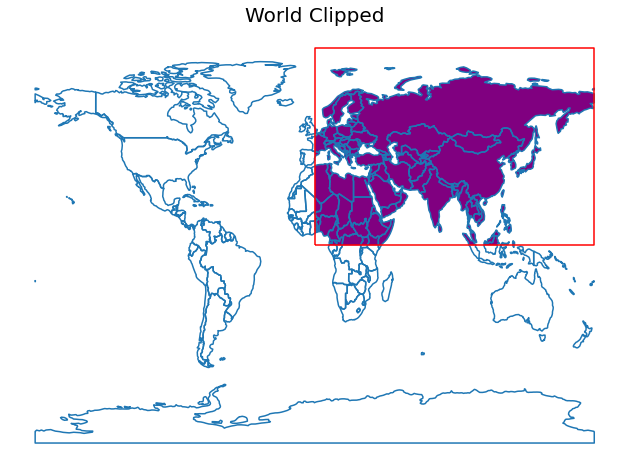

In [5]:
world_clipped = geopandas.clip(world, polygon)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the world
# sphinx_gallery_thumbnail_number = 2
fig, ax = plt.subplots(figsize=(12, 8))
world_clipped.plot(ax=ax, color="purple")
world.boundary.plot(ax=ax)
poly_gdf.boundary.plot(ax=ax, color="red")
ax.set_title("World Clipped", fontsize=20)
ax.set_axis_off()
plt.show()

Clip the Capitals Data
----------------------



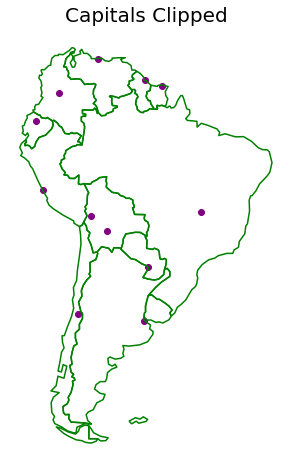

In [6]:
capitals_clipped = geopandas.clip(capitals, south_america)

# Plot the clipped data
# The plot below shows the results of the clip function applied to the capital cities
fig, ax = plt.subplots(figsize=(12, 8))
capitals_clipped.plot(ax=ax, color="purple")
south_america.boundary.plot(ax=ax, color="green")
ax.set_title("Capitals Clipped", fontsize=20)
ax.set_axis_off()
plt.show()